In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets

%matplotlib inline

In [2]:
num_workers = 0
batch_size = 100

transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers)

0it [00:00, ?it/s]

100%|███████████████████████████████████████████████████████████████████▉| 9904128/9912422 [01:04<00:00, 124796.75it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



0it [00:00, ?it/s]


  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 53159.01it/s]                                                                                          

0it [00:00, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



 99%|███████████████████████████████████████████████████████████████████▏| 1630208/1648877 [00:10<00:00, 165300.78it/s]
1654784it [00:10, 171004.93it/s]                                                                                       

0it [00:00, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw




8192it [00:00, 17100.20it/s]                                                                                           


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


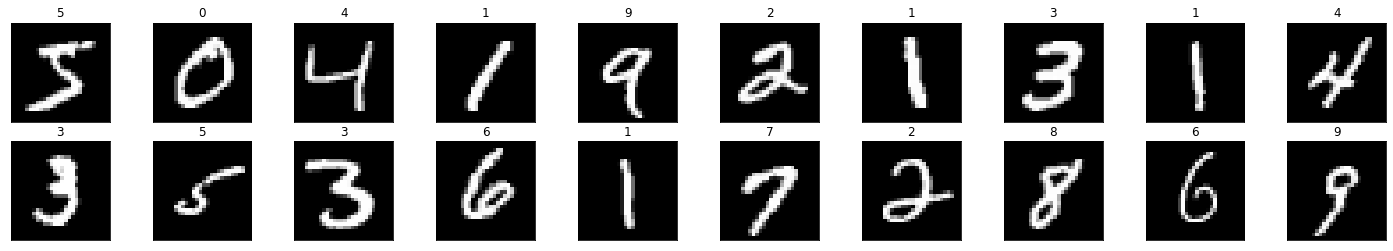

In [3]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

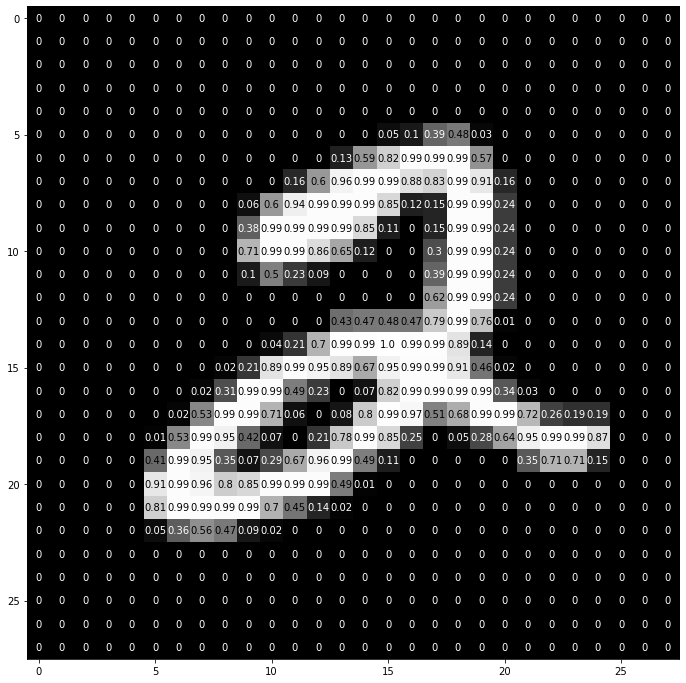

In [4]:
img = np.squeeze(images[5])
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy = (y, x),
                   horizontalalignment = 'center',
                    verticalalignment = 'center',
                    color = 'white' if img[x][y] < thresh else 'black')

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [7]:
n_epochs = 30
model.train()
for epoch in range(n_epochs):
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    
    train_loss = train_loss / len(train_loader.dataset)
    print("Epoch: {} \tTraining Loss: {:.6f}".format(epoch + 1, train_loss))

9920512it [01:20, 124796.75it/s]                                                                                       
1654784it [00:24, 171004.93it/s]

Epoch: 1 	Training Loss: 2.151647
Epoch: 2 	Training Loss: 1.604352
Epoch: 3 	Training Loss: 1.360274
Epoch: 4 	Training Loss: 1.275715
Epoch: 5 	Training Loss: 1.234173
Epoch: 6 	Training Loss: 1.208628
Epoch: 7 	Training Loss: 1.190565
Epoch: 8 	Training Loss: 1.176527
Epoch: 9 	Training Loss: 1.165014
Epoch: 10 	Training Loss: 1.155009
Epoch: 11 	Training Loss: 1.146132
Epoch: 12 	Training Loss: 1.138057
Epoch: 13 	Training Loss: 1.130666
Epoch: 14 	Training Loss: 1.123841
Epoch: 15 	Training Loss: 1.117510
Epoch: 16 	Training Loss: 1.111597
Epoch: 17 	Training Loss: 1.106041
Epoch: 18 	Training Loss: 1.100829
Epoch: 19 	Training Loss: 1.095905
Epoch: 20 	Training Loss: 1.091299
Epoch: 21 	Training Loss: 1.086934
Epoch: 22 	Training Loss: 1.082843
Epoch: 23 	Training Loss: 1.079027
Epoch: 24 	Training Loss: 1.075415
Epoch: 25 	Training Loss: 1.071922
Epoch: 26 	Training Loss: 1.068614
Epoch: 27 	Training Loss: 1.065467
Epoch: 28 	Training Loss: 1.062402
Epoch: 29 	Training Loss: 1.0

In [8]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
test_loss = test_loss/len(test_loader.dataset)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print("Test Accuracy of %5s: %2d%% (%2d/%2d)" % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print("\nTest Accuracy (Overall): %2d%% (%2d/%2d" % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))    

Test Loss: 1.059667

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1:  0% ( 0/1135)
Test Accuracy of     2: 96% (993/1032)
Test Accuracy of     3:  0% ( 0/1010)
Test Accuracy of     4: 95% (937/982)
Test Accuracy of     5: 96% (863/892)
Test Accuracy of     6:  0% ( 0/958)
Test Accuracy of     7: 95% (977/1028)
Test Accuracy of     8:  0% ( 0/974)
Test Accuracy of     9: 96% (969/1009)

Test Accuracy (Overall): 57% (5709/10000


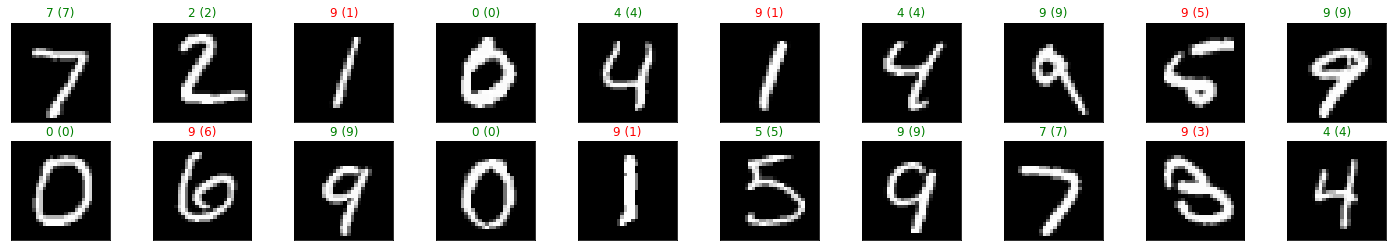

In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = "gray")
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color = ("green" if preds[idx] == labels[idx] else "red"))    